# API Demo and Testing
Notebook to demonstrate API use case and unit testing.

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

## DEMO
Demonstrating functionalities of API based on provided example.

In [2]:
# Define URL
# url = 'http://127.0.0.1:5000/' # -> USE THIS TO TEST LOCAL APPLICATION
url = 'http://127.0.0.1:8080/'  # -> USE THIS TO TEST DOCKER IMAGE

### POST: compute_coordinates
This endpoint computes pixel coordinate values for an image that is to be displayed on a 2D surface, given the dimensions of the image and teh corner points of the image as it is to be displayed.

In [3]:
# Define arguments
payload = {
    'img_dim': (4, 12),
    'corner_points': [(1, 1),(3, 1), (1, 3), (3, 3)]
}

# Make POST request to compute_coordinates endpoint
response = requests.post(url + 'compute_coordinates', json = payload)

# Get JSON respose
solution = response.json()

The response will be a dictionary with either a key 'solution' (given valid input) or 'message' (given invalid input). 'solution' is a list of all the coordinates, starting from the top of the image plane, organized by row.

In [4]:
# View response
solution

{'solution': [[[1.0, 3.0],
   [1.1818181818181819, 3.0],
   [1.3636363636363638, 3.0],
   [1.5454545454545454, 3.0],
   [1.7272727272727273, 3.0],
   [1.9090909090909092, 3.0],
   [2.090909090909091, 3.0],
   [2.2727272727272725, 3.0],
   [2.4545454545454546, 3.0],
   [2.6363636363636367, 3.0],
   [2.8181818181818183, 3.0],
   [3.0, 3.0]],
  [[1.0, 2.3333333333333335],
   [1.1818181818181819, 2.3333333333333335],
   [1.3636363636363638, 2.3333333333333335],
   [1.5454545454545454, 2.3333333333333335],
   [1.7272727272727273, 2.3333333333333335],
   [1.9090909090909092, 2.3333333333333335],
   [2.090909090909091, 2.3333333333333335],
   [2.2727272727272725, 2.3333333333333335],
   [2.4545454545454546, 2.3333333333333335],
   [2.6363636363636367, 2.3333333333333335],
   [2.8181818181818183, 2.3333333333333335],
   [3.0, 2.3333333333333335]],
  [[1.0, 1.6666666666666667],
   [1.1818181818181819, 1.6666666666666667],
   [1.3636363636363638, 1.6666666666666667],
   [1.5454545454545454, 1.66

### POST: plot_solution
This endpoint will plot pixel coordinates resulting from a successful 'compute_coordinates' request. It takes the JSON response from 'compute_coordinates' directly. 

In [5]:
# Make POST request to plot_solution endpoint using the above solution
response = requests.post(url + 'plot_solution', json = solution)

# Get JSON response
points = response.json()

The response will be a dictionary with either a key 'plot' (given valid input) or 'message' (given invalid input). 'key' is a list representing an NumPy image array. It must be converted to a NumPy array to be plotted/saved as an image.

In [6]:
# Convert points to an array
points = np.array(response.json()['plot'])

# View dimensions
points.shape

(480, 640, 3)

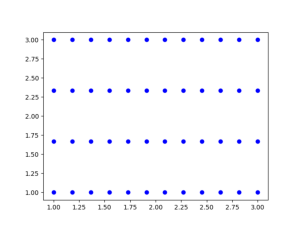

In [7]:
# Plot results
plt.imshow(points)
plt.axis('off')
plt.show()

## TESTS
Showing test results from tests/test_endpoints.py.

In [8]:
#### Test 1: Validating coordinates input ####
def test_input(url):
    # Invalid coordinate dimensions
    payload = {
    'img_dim': (0, 1),
    'corner_points': [(1, 1),(3, 1), (1, 3), (3, 3)]
    }
    res1 = requests.post(url + '/compute_coordinates', json = payload)
    assert res1.status_code == 501, 'FAIL'

    # Invalid number of points
    payload = {
    'img_dim': (3, 3),
    'corner_points': [(1, 1),(3, 1), (1, 3), (3, 3), (3, 4)]
    }
    res2 = requests.post(url + '/compute_coordinates', json = payload)
    assert res2.status_code == 502, 'FAIL'

    # Invalid rectangle
    payload = {
    'img_dim': (3, 3),
    'corner_points': [(1, 1),(3, 1), (1, 3), (4, 3)]
    }
    res3 = requests.post(url + '/compute_coordinates', json = payload)
    assert res3.status_code == 503, 'FAIL'

    # Valid rectangle
    payload = {
    'img_dim': (3, 3),
    'corner_points': [(1, 1),(3, 1), (1, 3), (3, 3)]
    }
    res4 = requests.post(url + '/compute_coordinates', json = payload)
    assert res4.status_code == 201, 'FAIL'
    
    return


#### Test 2: Checking compute_coordinates output ####
def test_coords(url):
    # Example 1
    payload = {
    'img_dim': (3, 3),
    'corner_points': [(1, 1),(3, 1), (1, 3), (3, 3)]
    }
    res1 = requests.post(url + '/compute_coordinates', json = payload)
    assert res1.status_code == 201, 'FAIL'
    json1 = res1.json()
    assert 'solution' in json1, 'FAIL'
    assert json1['solution'] == [[[1.0, 3.0], [2.0, 3.0], [3.0, 3.0]],[[1.0, 2.0], [2.0, 2.0], [3.0, 2.0]], [[1.0, 1.0], [2.0, 1.0], [3.0, 1.0]]], 'FAIL'

    # Example 2
    payload = {
    'img_dim': (4, 5),
    'corner_points': [(1.5, 8.0),(4.0, 8.0), (1.5, 1.5), (4.0, 1.5)]
    }
    res2 = requests.post(url + '/compute_coordinates', json = payload)
    json2 = res2.json()
    assert 'solution' in json2, 'FAIL'
    assert json2['solution'] == [[[1.5, 8.0],[2.125, 8.0],[2.75, 8.0],[3.375, 8.0],[4.0, 8.0]],[[1.5, 5.833333333333334],[2.125, 5.833333333333334],[2.75, 5.833333333333334],[3.375, 5.833333333333334],[4.0, 5.833333333333334]],[[1.5, 3.666666666666667],[2.125, 3.666666666666667],[2.75, 3.666666666666667],[3.375, 3.666666666666667],[4.0, 3.666666666666667]],[[1.5, 1.5], [2.125, 1.5], [2.75, 1.5], [3.375, 1.5], [4.0, 1.5]]], 'FAIL'

    return


#### Test 3: Testing plot_solution output ####
def test_plots(url):
    # Success example
    payload = {
        'solution': [[[1.0, 3.0], [2.0, 3.0], [3.0, 3.0]],[[1.0, 2.0], [2.0, 2.0], [3.0, 2.0]], [[1.0, 1.0], [2.0, 1.0], [3.0, 1.0]]]
    }
    res1 = requests.post(url + '/plot_solution', json = payload)
    json1 = res1.json()
    assert res1.status_code == 201, 'FAIL'
    assert 'plot' in json1, 'FAIL'

    # Fail example
    payload = {
        'message': 'ValueError: Image dimensions invalid. Required format: (height > 0, width > 0).'
    }
    res2 = requests.post(url + '/plot_solution', json = payload)
    json2 = res2.json()
    assert res2.status_code == 400, 'FAIL'
    assert 'message' in json2, 'FAIL'

    return

In [9]:
# Run tests: If they all pass, no output. If any fail, there will be an AssertionError
test_input(url)
test_coords(url)
test_plots(url)